<a href="https://colab.research.google.com/github/IvanSholana/Car-Detection/blob/main/YOLO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [2]:
!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 29.2/78.2 GB disk)


In [3]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from roboflow import Roboflow

rf = Roboflow(api_key='YOUR_API_KEY')
project = rf.workspace('WORKSPACE').project('PROJECT')
version = project.version(1)
dataset = project.version(1).download('yolov8')

mkdir: cannot create directory ‘/content/datasets’: File exists
/content/datasets
loading Roboflow workspace...
loading Roboflow project...


In [4]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8n.pt data={dataset.location}/data.yaml epochs=25 imgsz=800 plots=True

/content
New https://pypi.org/project/ultralytics/8.1.47 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/datasets/Car-Detection-1/data.yaml, epochs=25, patience=50, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize

In [5]:
!ls {HOME}/runs/detect/train/

args.yaml  weights


/content


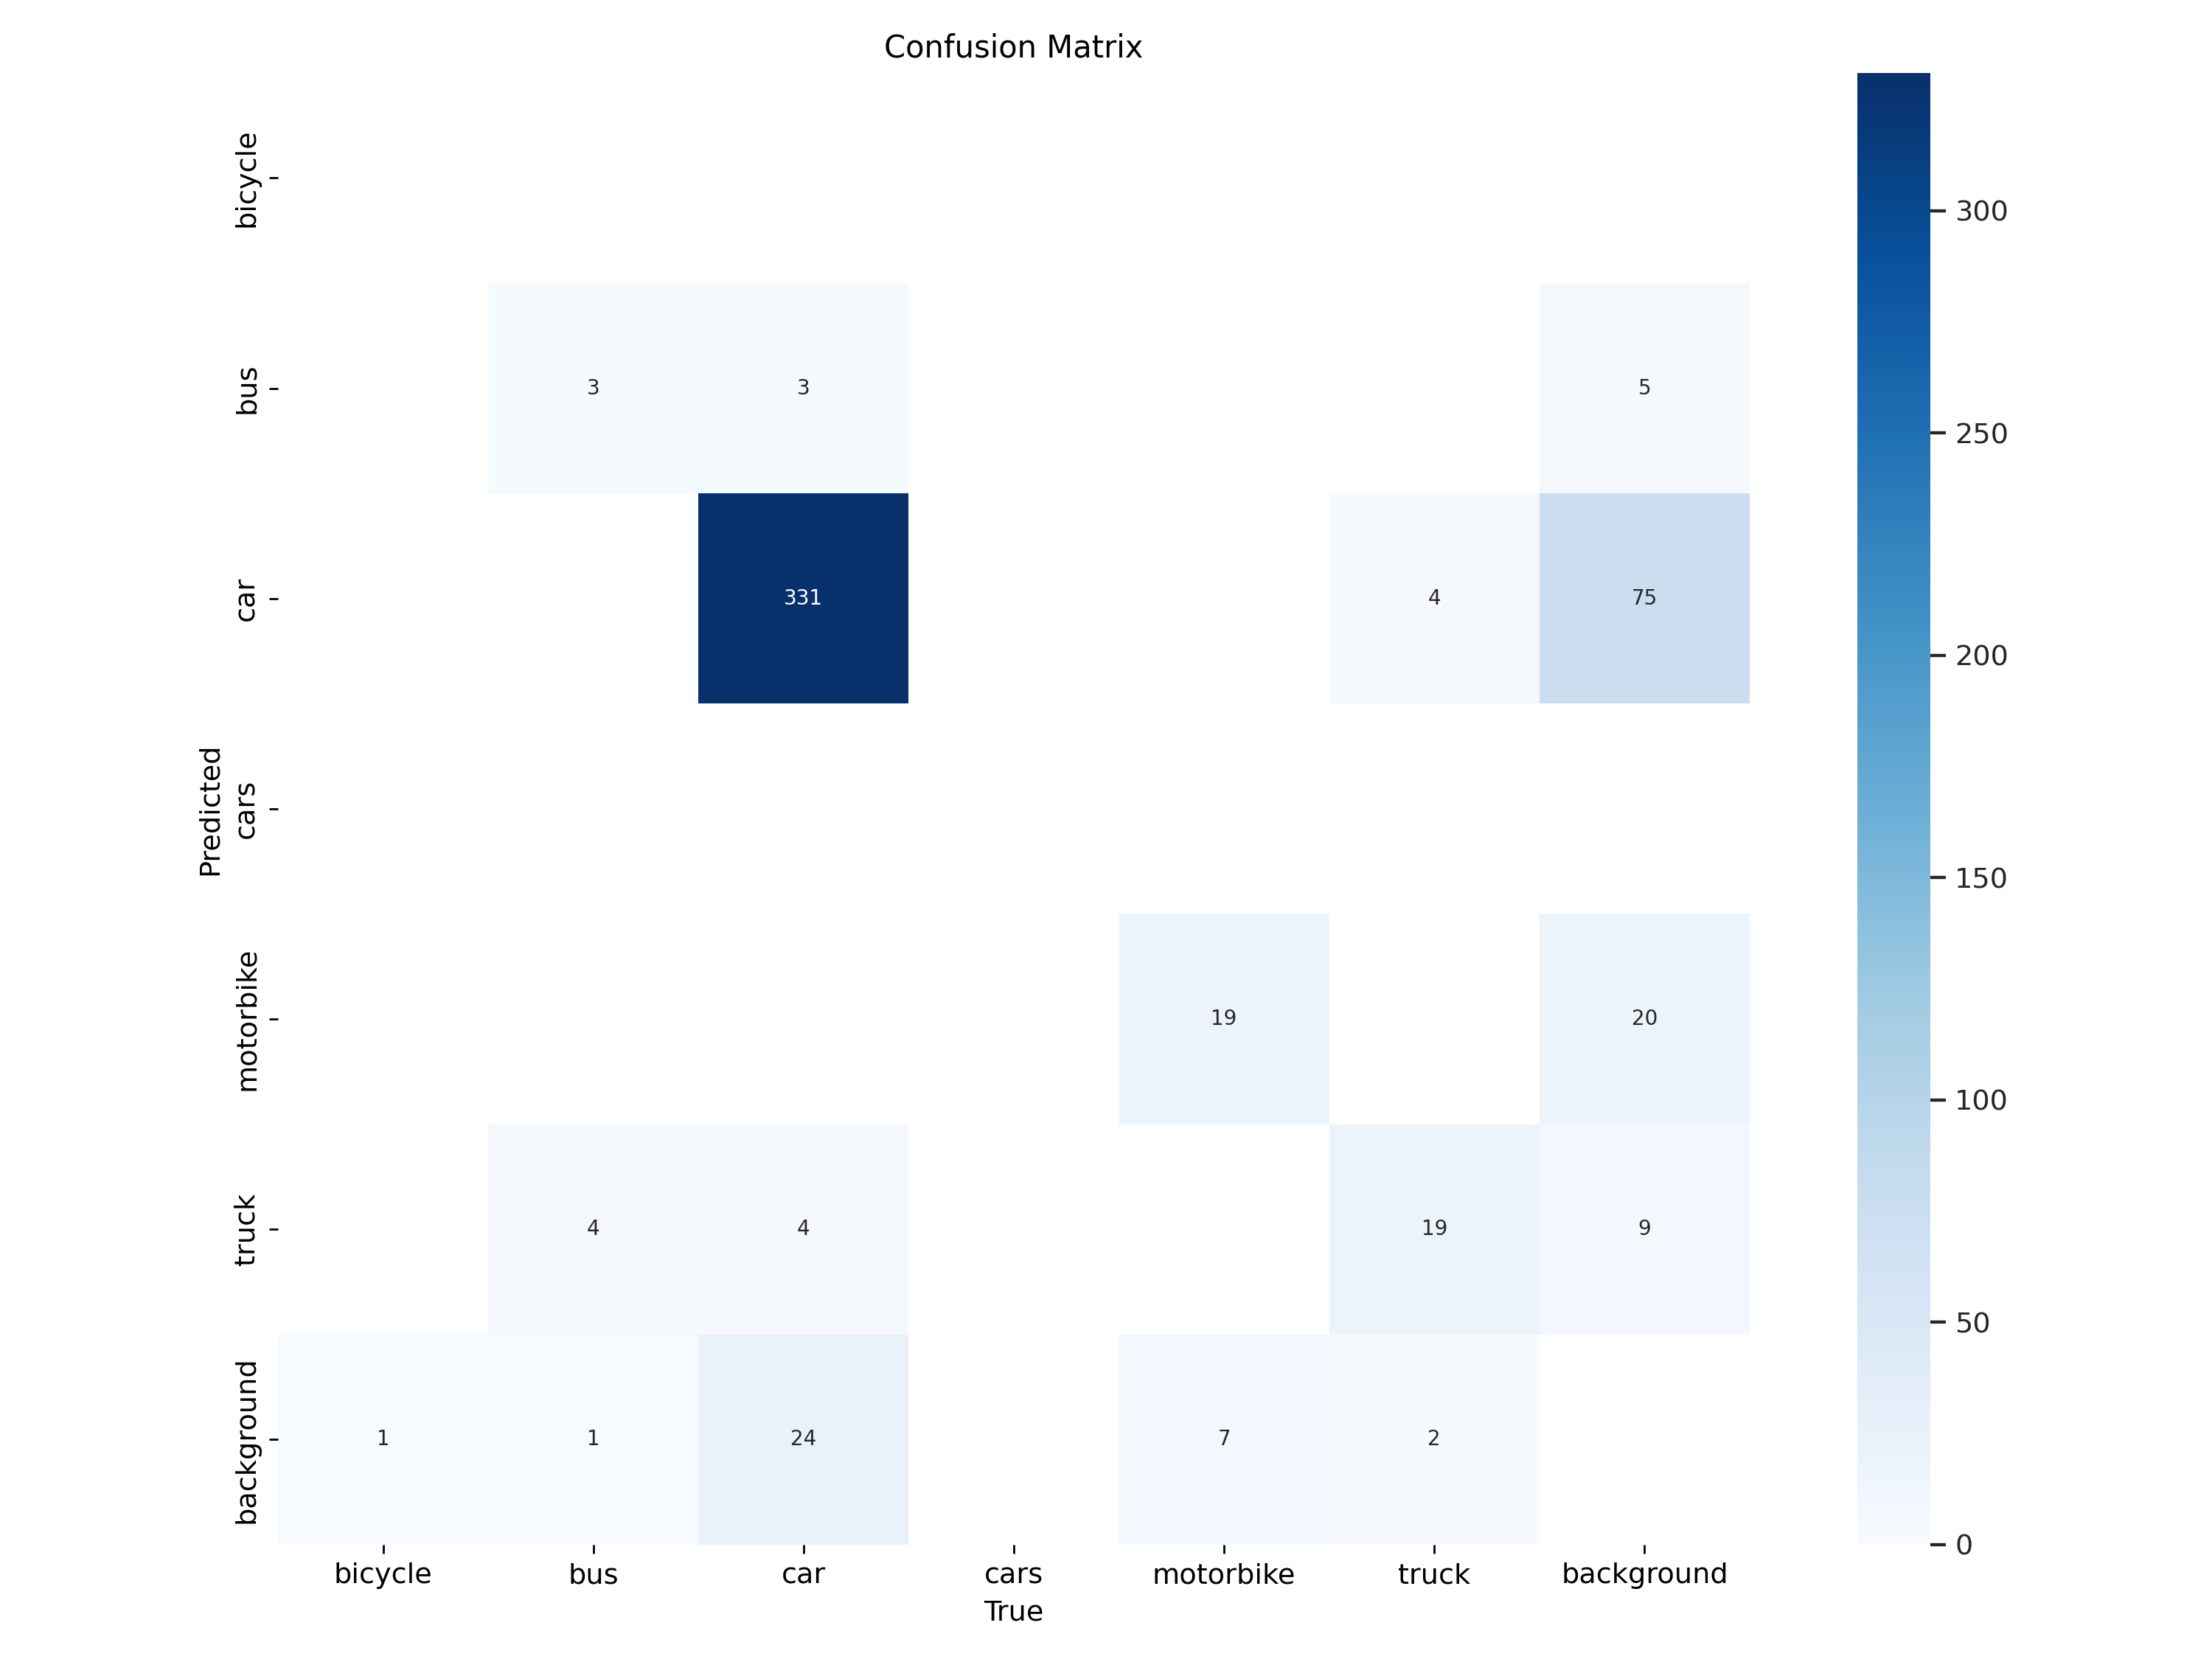

In [9]:
from IPython.display import display, Image

%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


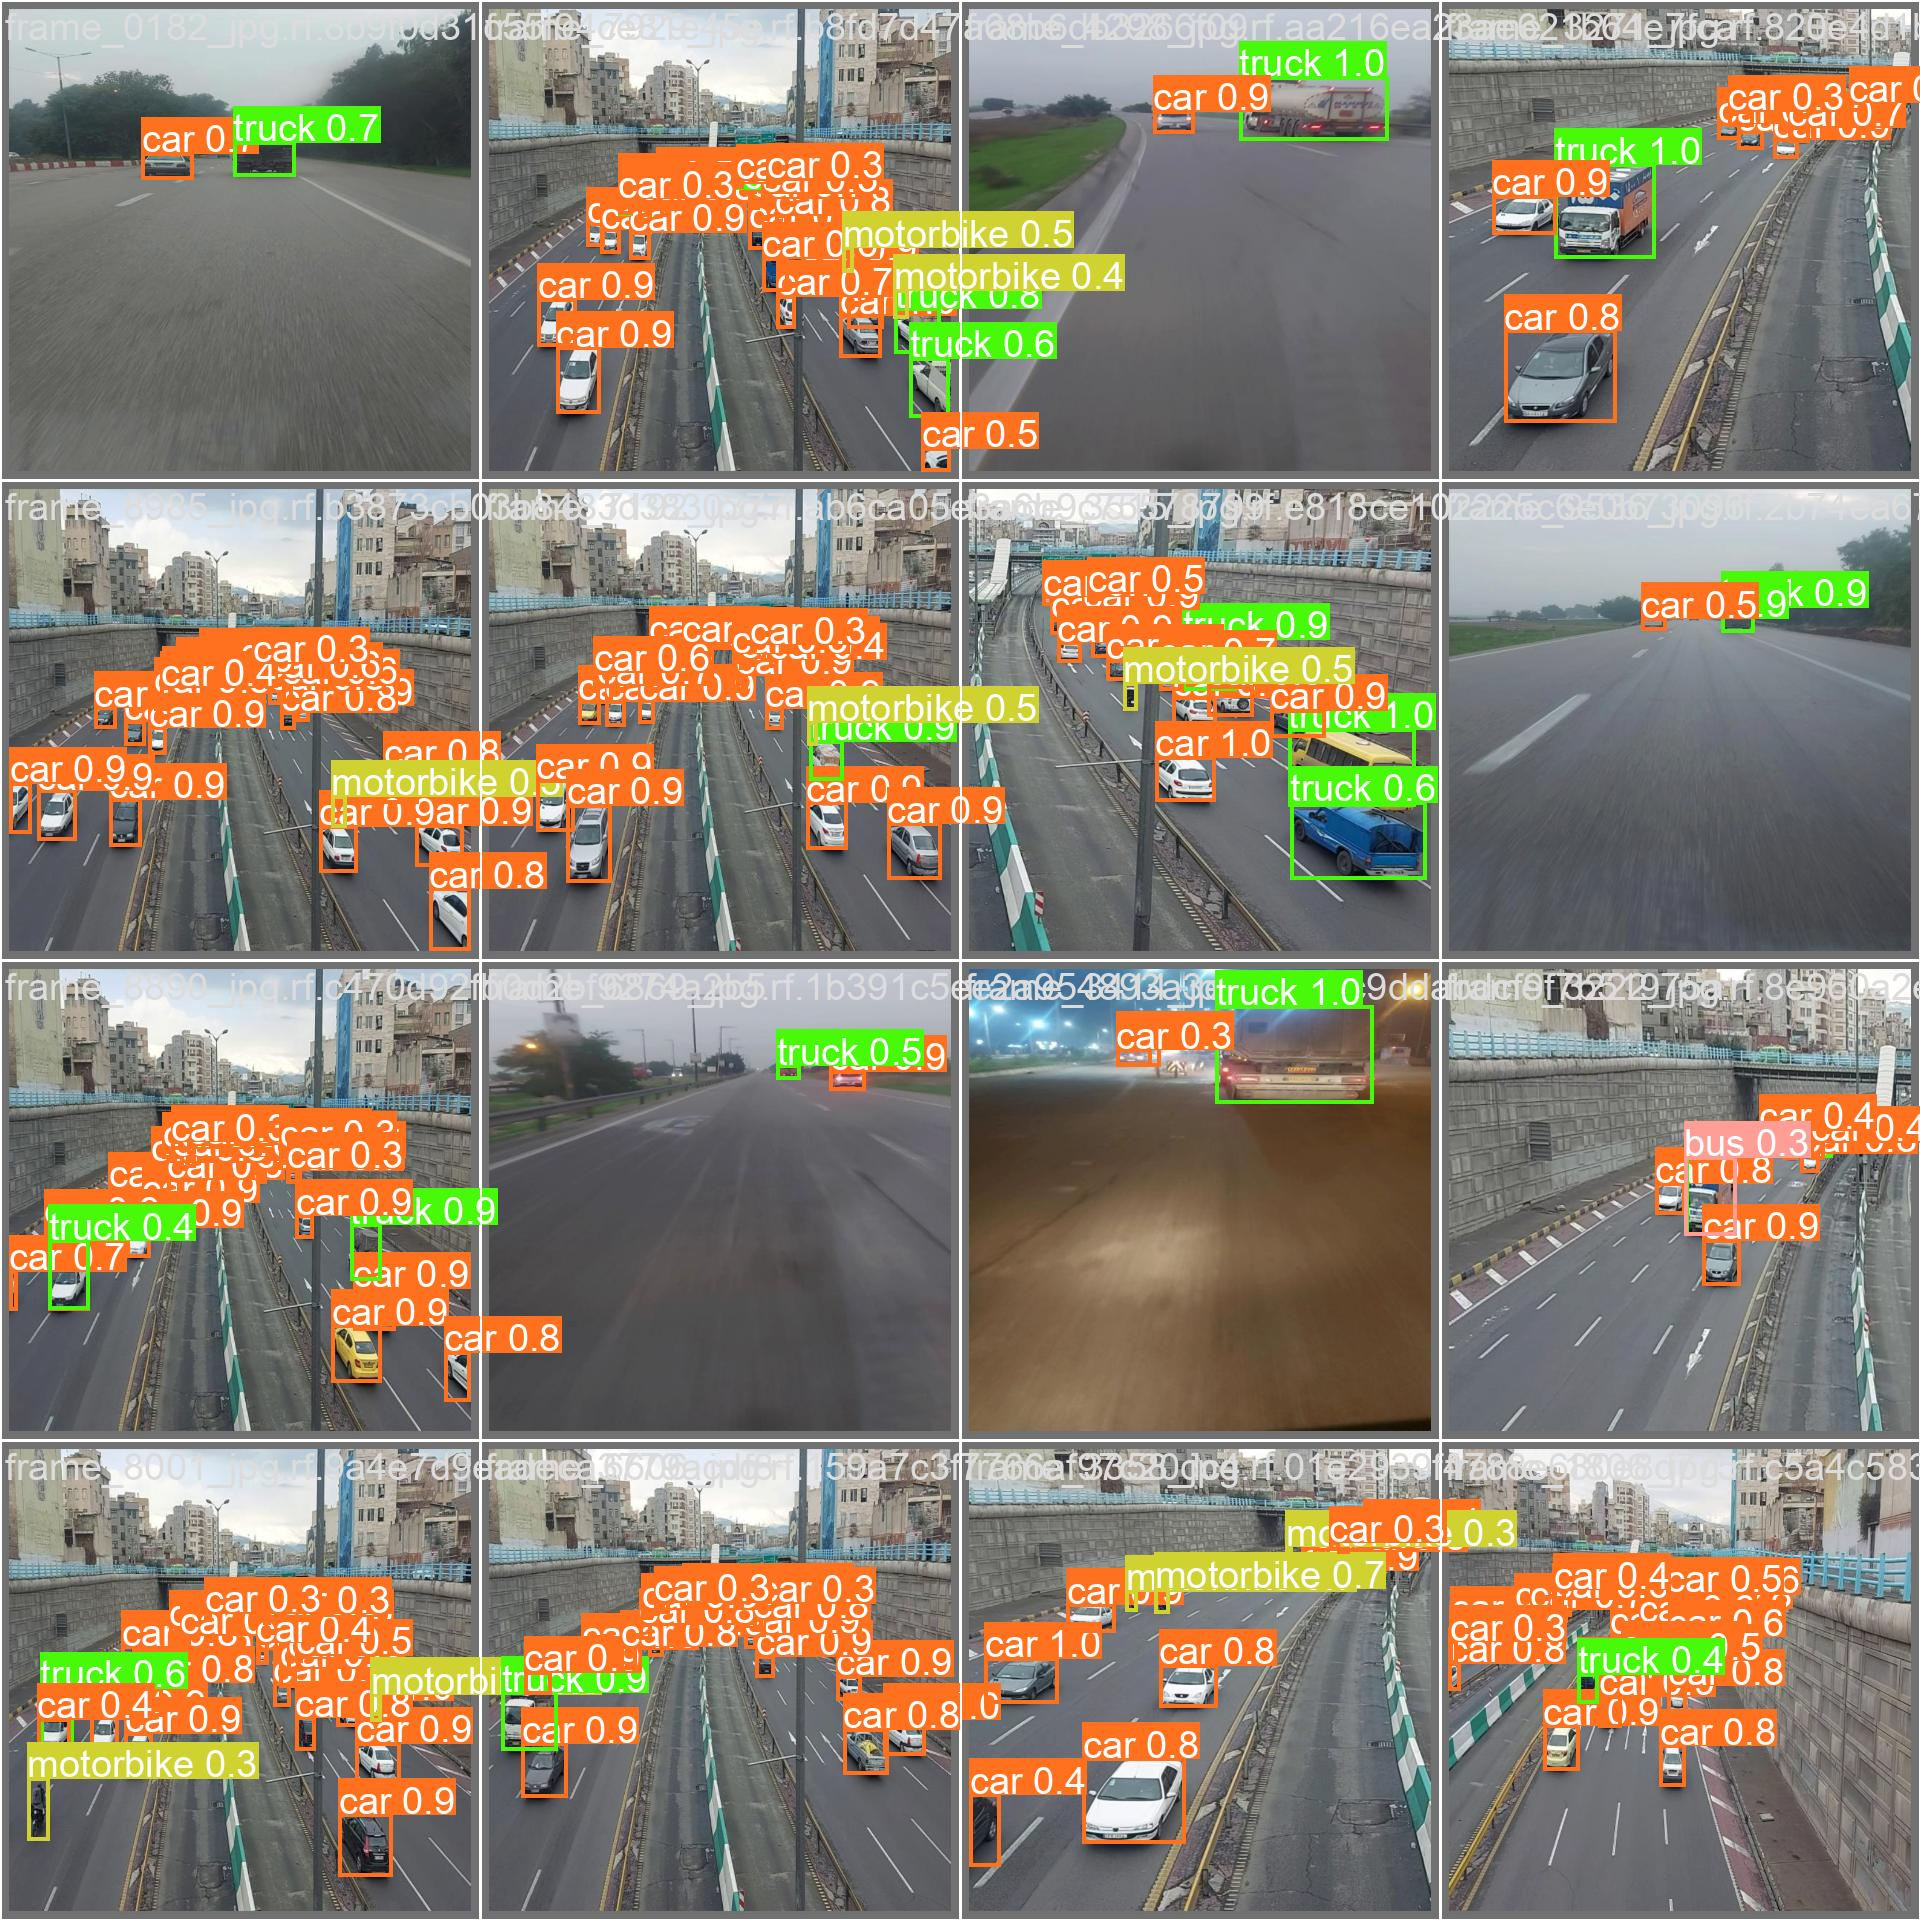

In [10]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

/content


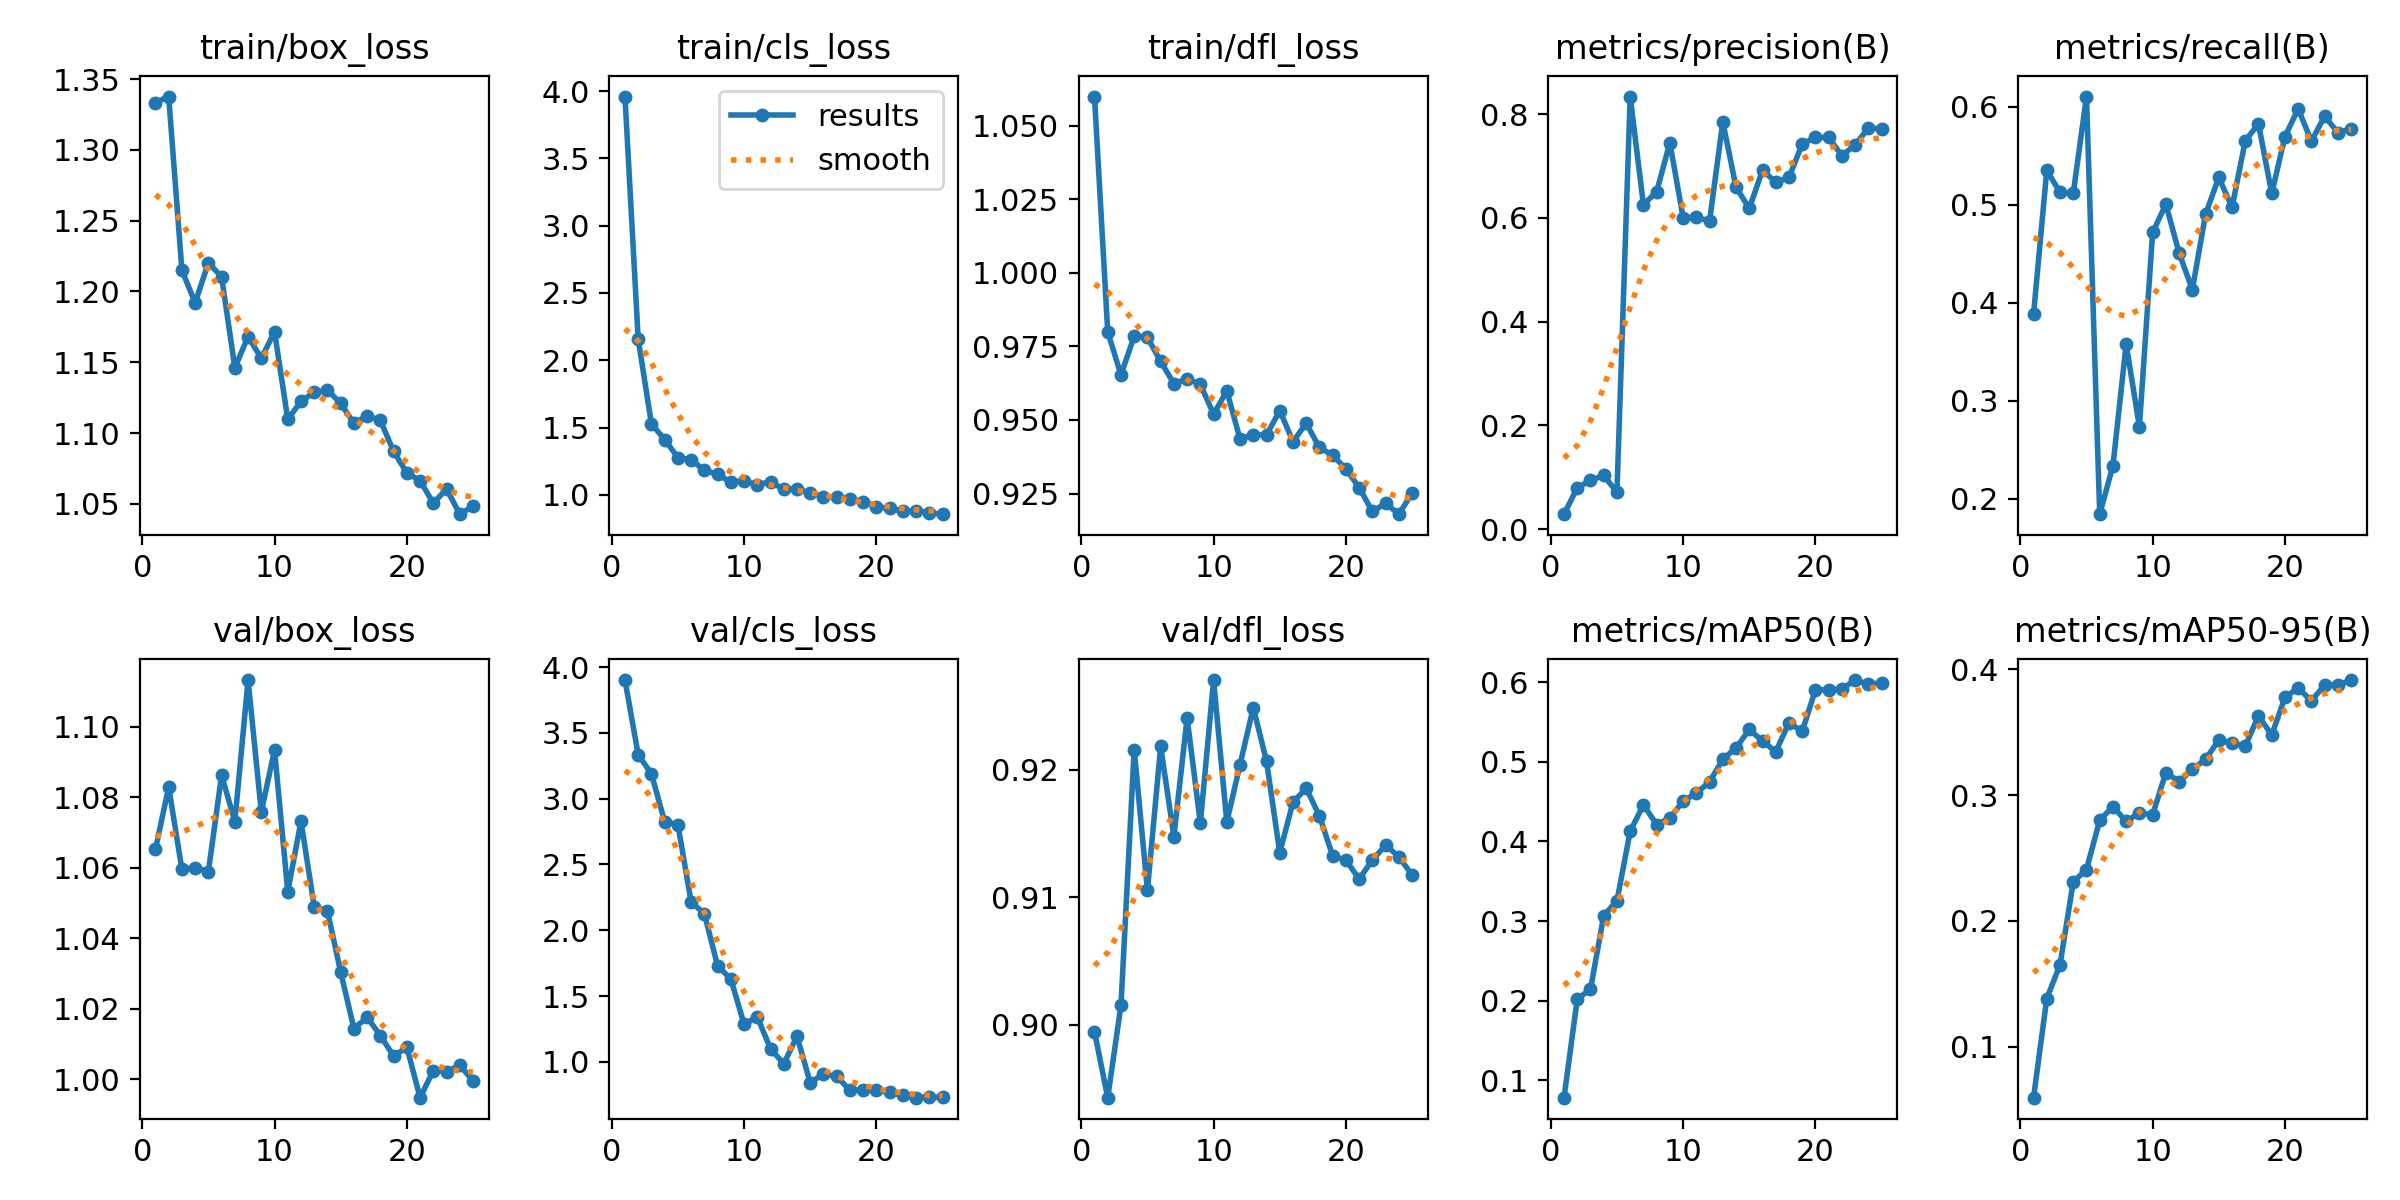

In [11]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

In [12]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006818 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /content/datasets/Car-Detection-1/valid/labels.cache... 29 images, 0 backgrounds, 0 corrupt: 100% 29/29 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 2/2 [00:02<00:00,  1.42s/it]
                   all         29        422      0.771      0.578      0.599       0.39
               bicycle         29          1          1          0          0          0
                   bus         29          8      0.501      0.377      0.487      0.375
                   car         29        362      0.877      0.901

In [13]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006818 parameters, 0 gradients, 8.1 GFLOPs

image 1/14 /content/datasets/Car-Detection-1/test/images/frame_0087_jpg.rf.02be1594d99e057dc83fb49de7bf2c5e.jpg: 800x800 3 cars, 1 truck, 10.7ms
image 2/14 /content/datasets/Car-Detection-1/test/images/frame_1000_jpg.rf.15d228b3fcd25d6f528e924df3873ce6.jpg: 800x800 18 cars, 4 motorbikes, 1 truck, 10.0ms
image 3/14 /content/datasets/Car-Detection-1/test/images/frame_1001_jpg.rf.d34e2dda8ac6685d22ab387c8288fd50.jpg: 800x800 18 cars, 5 motorbikes, 1 truck, 10.0ms
image 4/14 /content/datasets/Car-Detection-1/test/images/frame_1009_jpg.rf.10dc510d37ef00450b4946fec41e6eaf.jpg: 800x800 19 cars, 5 motorbikes, 10.0ms
image 5/14 /content/datasets/Car-Detection-1/test/images/frame_1014_jpg.rf.2e6bbb79036b8830dd8fa386d2928cda.jpg: 800x800 17 cars, 3 motorbikes, 1 truck, 10.0ms
image 6/14 /content/datasets/Car-Detection-1/te

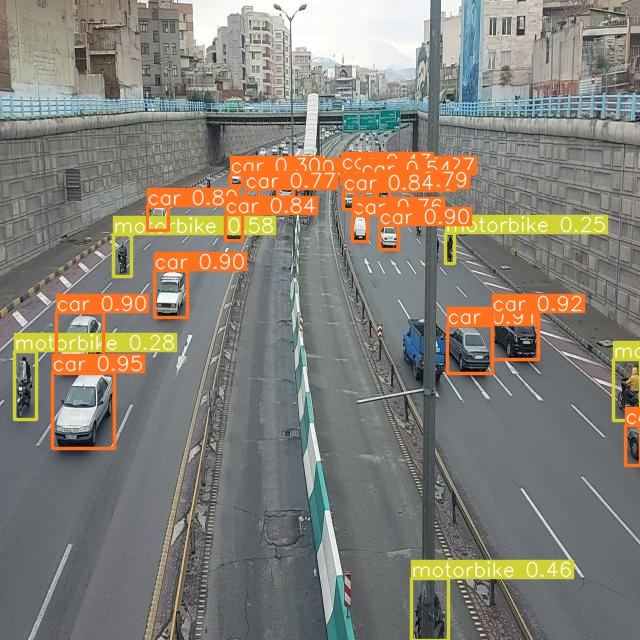

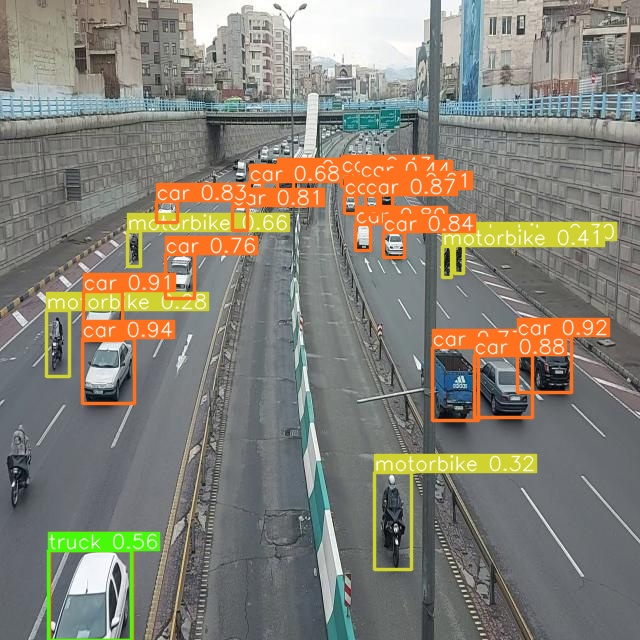

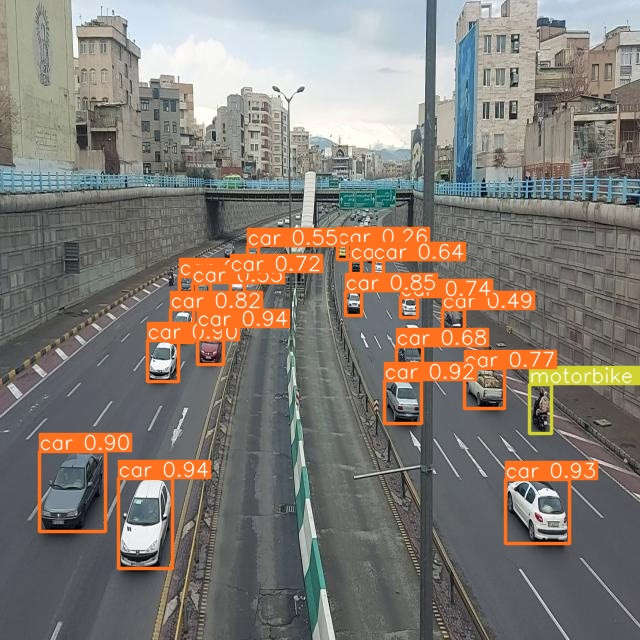

In [14]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={yourpath}